In [1]:
#import necessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#import necssary date and time libraries 
import datetime
from datetime import datetime
from datetime import timedelta
from datetime import date
from datetime import time

#preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#import all the ml models 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
#lstm 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [2]:
#import the dataset
df = pd.read_csv(r"C:\Users\s\Desktop\car accidents predictions 04 apr 24\Accidents0515.csv")
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [4]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1.780515e+06,1.780515e+06,1.780515e+06,1.780515e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,...,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06
mean,4.401799e+05,2.985128e+05,-1.428579e+00,5.257450e+01,3.075348e+01,2.838219e+00,1.832064e+00,1.349454e+00,4.115302e+00,3.532614e+02,...,3.782832e+02,9.261209e-03,7.375014e-01,1.950535e+00,1.575724e+00,1.358392e+00,1.090639e-01,7.219374e-02,1.356260e+00,1.193455e+00
std,9.547599e+04,1.612254e+05,1.403495e+00,1.451753e+00,2.551787e+01,4.017948e-01,7.148732e-01,8.237479e-01,1.923763e+00,2.593133e+02,...,1.297375e+03,1.276795e-01,1.818855e+00,1.648467e+00,1.642447e+00,6.243018e-01,7.304625e-01,6.193070e-01,4.790610e-01,4.011830e-01
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,3.764000e+05,1.779900e+05,-2.354786e+00,5.148769e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,4.413200e+05,2.649500e+05,-1.386472e+00,5.227209e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,5.234235e+05,3.965700e+05,-2.164865e-01,5.346409e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.310000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,6.555400e+05,1.208800e+06,1.762010e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,...,9.999000e+03,2.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00


In [5]:
#Lets See the missing values and sort them out 
missing = df.isnull().sum().sort_values(ascending = False)
missing = missing[missing > 0]
missing

LSOA_of_Accident_Location    129471
Time                            151
Location_Northing_OSGR          138
Longitude                       138
Latitude                        138
Location_Easting_OSGR           138
dtype: int64

In [6]:
# As we have 129471 Missing values in teh LSOA of accident column so we can remove the column to get acutal results 
df1 = df.drop("LSOA_of_Accident_Location", axis = 1)
df1.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,0,1,1,2,2,0,0,1,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,0,5,4,1,1,0,0,1,1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,0,4,1,1,0,0,1,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,0,1,1,1,0,0,1,1
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,0,7,1,2,0,0,1,1


In [7]:
#lets replace the missing values in time column most frequent value
df1["Time"] = df1["Time"].fillna(df1["Time"].mode()[0])
df1["Time"].isnull().sum()

0

In [8]:
df1.head().T

,0,1,2,3,4
Accident_Index,200501BS00001,200501BS00002,200501BS00003,200501BS00004,200501BS00005
Location_Easting_OSGR,525680.0,524170.0,524520.0,526900.0,528060.0
Location_Northing_OSGR,178240.0,181650.0,182240.0,177530.0,179040.0
Longitude,-0.19117,-0.211708,-0.206458,-0.173862,-0.156618
Latitude,51.489096,51.520075,51.525301,51.482442,51.495752
Police_Force,1,1,1,1,1
Accident_Severity,2,3,3,3,3
Number_of_Vehicles,1,1,2,1,1
Number_of_Casualties,1,1,1,1,1
Date,04/01/2005,05/01/2005,06/01/2005,07/01/2005,10/01/2005


In [9]:
#lets fill the values of remaining missing values with the most frequent values in coolumns Location_Northing_OSGR, Longitude, Latitude and Location_Easting_OSGR
df1["Location_Northing_OSGR"] = df1["Location_Northing_OSGR"].fillna(df1["Location_Northing_OSGR"].mode()[0])
df1["Longitude"] = df1["Longitude"].fillna(df1["Longitude"].mode()[0])
df1["Latitude"] = df1["Latitude"].fillna(df1["Latitude"].mode()[0])
df1["Location_Easting_OSGR"] = df1["Location_Easting_OSGR"].fillna(df1["Location_Easting_OSGR"].mode()[0])

df1.isnull().sum().sort_values(ascending=False)

Accident_Index                                 0
Road_Type                                      0
Urban_or_Rural_Area                            0
Carriageway_Hazards                            0
Special_Conditions_at_Site                     0
Road_Surface_Conditions                        0
Weather_Conditions                             0
Light_Conditions                               0
Pedestrian_Crossing-Physical_Facilities        0
Pedestrian_Crossing-Human_Control              0
2nd_Road_Number                                0
2nd_Road_Class                                 0
Junction_Control                               0
Junction_Detail                                0
Speed_limit                                    0
1st_Road_Number                                0
Location_Easting_OSGR                          0
1st_Road_Class                                 0
Local_Authority_(Highway)                      0
Local_Authority_(District)                     0
Time                

In [10]:
#As we know that there is no Missing Values in the dataset So, we Can now carry out statiscal analysis on the dataset
#First lets add number of accidents per day in the dataset
df1["Date"] = pd.to_datetime(df1["Date"], format="%d/%m/%Y")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 31 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Accident_Index                               object        
 1   Location_Easting_OSGR                        float64       
 2   Location_Northing_OSGR                       float64       
 3   Longitude                                    float64       
 4   Latitude                                     float64       
 5   Police_Force                                 int64         
 6   Accident_Severity                            int64         
 7   Number_of_Vehicles                           int64         
 8   Number_of_Casualties                         int64         
 9   Date                                         datetime64[ns]
 10  Day_of_Week                                  int64         
 11  Time                                 

In [11]:
#Drop the Accident index as it is unique for each accident
df1 = df1.drop("Accident_Index", axis = 1)
df1.head().T

,0,1,2,3,4
Location_Easting_OSGR,525680.0,524170.0,524520.0,526900.0,528060.0
Location_Northing_OSGR,178240.0,181650.0,182240.0,177530.0,179040.0
Longitude,-0.19117,-0.211708,-0.206458,-0.173862,-0.156618
Latitude,51.489096,51.520075,51.525301,51.482442,51.495752
Police_Force,1,1,1,1,1
Accident_Severity,2,3,3,3,3
Number_of_Vehicles,1,1,2,1,1
Number_of_Casualties,1,1,1,1,1
Date,2005-01-04 00:00:00,2005-01-05 00:00:00,2005-01-06 00:00:00,2005-01-07 00:00:00,2005-01-10 00:00:00
Day_of_Week,3,4,5,6,2


In [12]:
#Drop the location easting ogr and location norther as we have latitude and longitude
df1 = df1.drop(["Location_Easting_OSGR", "Location_Northing_OSGR"], axis = 1)
df1.head().T



,0,1,2,3,4
Longitude,-0.19117,-0.211708,-0.206458,-0.173862,-0.156618
Latitude,51.489096,51.520075,51.525301,51.482442,51.495752
Police_Force,1,1,1,1,1
Accident_Severity,2,3,3,3,3
Number_of_Vehicles,1,1,2,1,1
Number_of_Casualties,1,1,1,1,1
Date,2005-01-04 00:00:00,2005-01-05 00:00:00,2005-01-06 00:00:00,2005-01-07 00:00:00,2005-01-10 00:00:00
Day_of_Week,3,4,5,6,2
Time,17:42,17:36,00:15,10:35,21:13
Local_Authority_(District),12,12,12,12,12


In [13]:
#Lets sort the dataset by date
df1 = df1.sort_values("Date")
df1.head().T

,2566,113988,101946,101953,195774
Longitude,-0.141486,0.495566,-1.079067,-1.197381,-4.424771
Latitude,51.524199,52.949128,52.966191,52.824471,55.926843
Police_Force,1,36,31,31,97
Accident_Severity,3,3,3,2,3
Number_of_Vehicles,3,1,1,1,1
Number_of_Casualties,1,1,2,3,1
Date,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00
Day_of_Week,7,7,7,7,7
Time,02:50,01:35,03:17,04:55,09:00
Local_Authority_(District),2,407,343,347,916


In [14]:
#lets add new column ser to the dataset as first column 
df1.insert(0, "Ser", range(1, 1+len(df1)))
df1.head().T

,2566,113988,101946,101953,195774
Ser,1,2,3,4,5
Longitude,-0.141486,0.495566,-1.079067,-1.197381,-4.424771
Latitude,51.524199,52.949128,52.966191,52.824471,55.926843
Police_Force,1,36,31,31,97
Accident_Severity,3,3,3,2,3
Number_of_Vehicles,3,1,1,1,1
Number_of_Casualties,1,1,2,3,1
Date,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00
Day_of_Week,7,7,7,7,7
Time,02:50,01:35,03:17,04:55,09:00


In [15]:
#set the ser Column as index column 
df1 = df1.set_index("Ser")
df1.head().T

Ser,1,2,3,4,5
Longitude,-0.141486,0.495566,-1.079067,-1.197381,-4.424771
Latitude,51.524199,52.949128,52.966191,52.824471,55.926843
Police_Force,1,36,31,31,97
Accident_Severity,3,3,3,2,3
Number_of_Vehicles,3,1,1,1,1
Number_of_Casualties,1,1,2,3,1
Date,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00
Day_of_Week,7,7,7,7,7
Time,02:50,01:35,03:17,04:55,09:00
Local_Authority_(District),2,407,343,347,916


In [16]:
#lets add the number of accidents per day in the dataset
df1["Accidents_per_date"]  = df1.groupby("Date")["Date"].transform("count")
df1.head().T    

Ser,1,2,3,4,5
Longitude,-0.141486,0.495566,-1.079067,-1.197381,-4.424771
Latitude,51.524199,52.949128,52.966191,52.824471,55.926843
Police_Force,1,36,31,31,97
Accident_Severity,3,3,3,2,3
Number_of_Vehicles,3,1,1,1,1
Number_of_Casualties,1,1,2,3,1
Date,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00,2005-01-01 00:00:00
Day_of_Week,7,7,7,7,7
Time,02:50,01:35,03:17,04:55,09:00
Local_Authority_(District),2,407,343,347,916


In [17]:
#Now let correct the data type of each coulmn 
df1.dtypes

Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Type                                               int64
Speed_limit                                             int64
Junction_Detail                                         int64
Junction

In [18]:
#lets encode the  Local_Authority_(Highway) through label encoder 
le = LabelEncoder()
df1["Local_Authority_(Highway)"] = le.fit_transform(df1["Local_Authority_(Highway)"])
#check data type now 
df1.dtypes

Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                               int32
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Type                                               int64
Speed_limit                                             int64
Junction_Detail                                         int64
Junction

In [19]:
df1.Time.head()

Ser
1    02:50
2    01:35
3    03:17
4    04:55
5    09:00
Name: Time, dtype: object

In [20]:
#change the Time into 24 Hours only and not minutes
df1["Time"] = df1["Time"].apply(lambda x: x.split(":")[0])
df1["Time"] = df1["Time"].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780653 entries, 1 to 1780653
Data columns (total 29 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Longitude                                    float64       
 1   Latitude                                     float64       
 2   Police_Force                                 int64         
 3   Accident_Severity                            int64         
 4   Number_of_Vehicles                           int64         
 5   Number_of_Casualties                         int64         
 6   Date                                         datetime64[ns]
 7   Day_of_Week                                  int64         
 8   Time                                         int32         
 9   Local_Authority_(District)                   int64         
 10  Local_Authority_(Highway)                    int32         
 11  1st_Road_Class                            

In [21]:

df1.Time.head()

Ser
1    2
2    1
3    3
4    4
5    9
Name: Time, dtype: int32

In [22]:
#check unique values in the in the dataset  
df1.nunique()

Longitude                                      1246102
Latitude                                       1168981
Police_Force                                        51
Accident_Severity                                    3
Number_of_Vehicles                                  28
Number_of_Casualties                                51
Date                                              4017
Day_of_Week                                          7
Time                                                24
Local_Authority_(District)                         416
Local_Authority_(Highway)                          207
1st_Road_Class                                       6
1st_Road_Number                                   7062
Road_Type                                            6
Speed_limit                                          9
Junction_Detail                                     10
Junction_Control                                     6
2nd_Road_Class                                       7
2nd_Road_N

c:\Users\s\miniconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s\miniconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


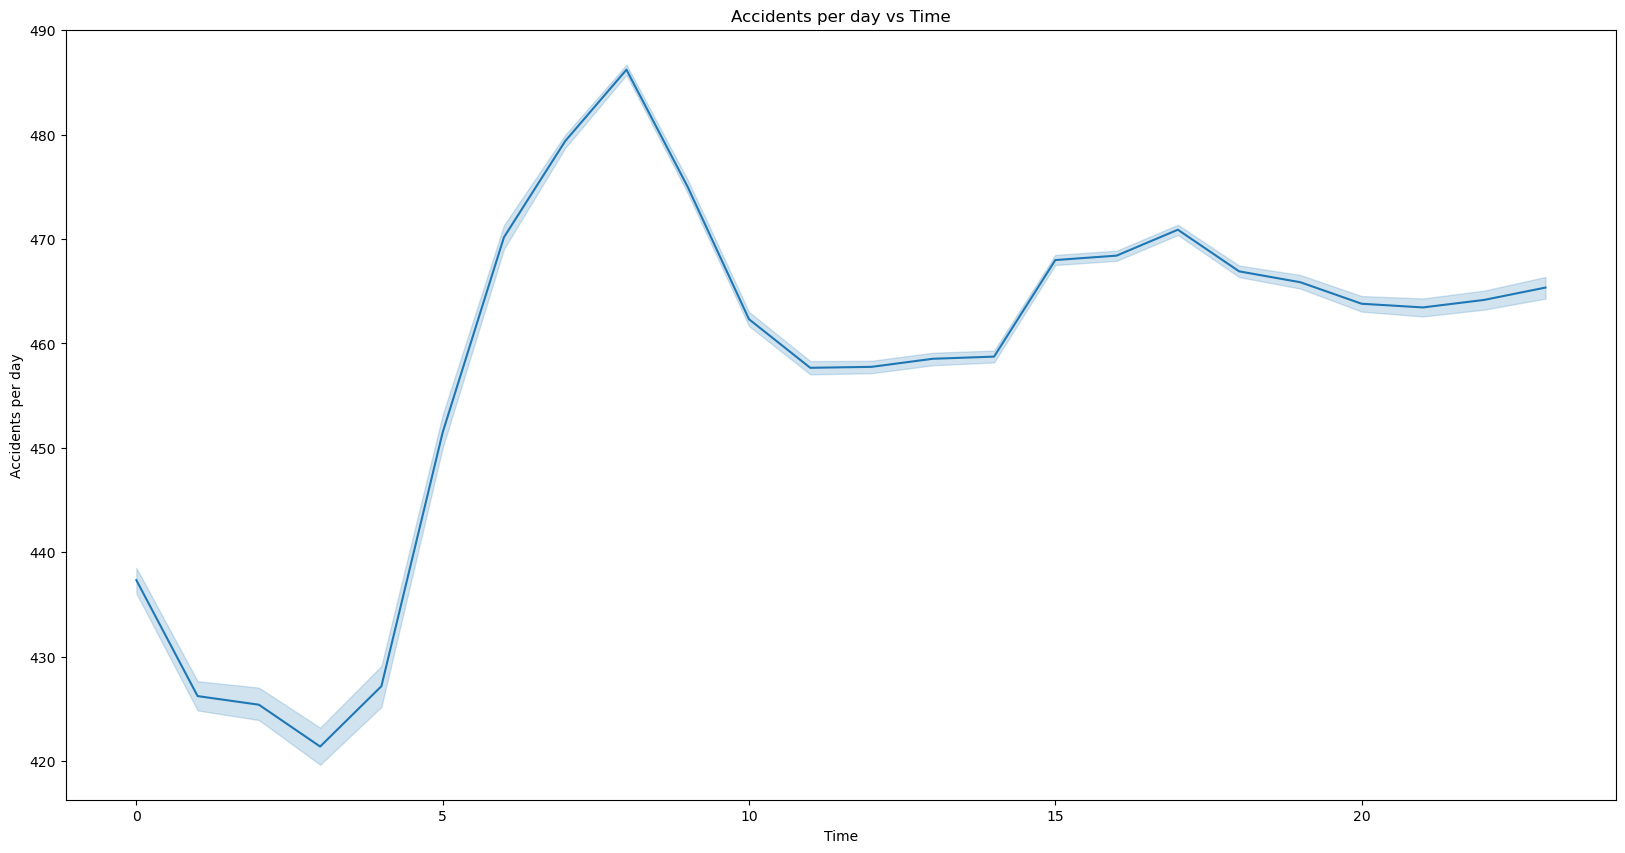

In [23]:
#lets plot the accidents per day vs Time
plt.figure(figsize=(20, 10))
sns.lineplot(x = df1["Time"], y = df1["Accidents_per_date"])
plt.title("Accidents per day vs Time")
plt.xlabel("Time")
plt.ylabel("Accidents per day")
plt.show()

C:\Users\s\AppData\Local\Temp\ipykernel_13136\33299373.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df1["Day_of_Week"], y = df1["Accidents_per_date"], ci = None)


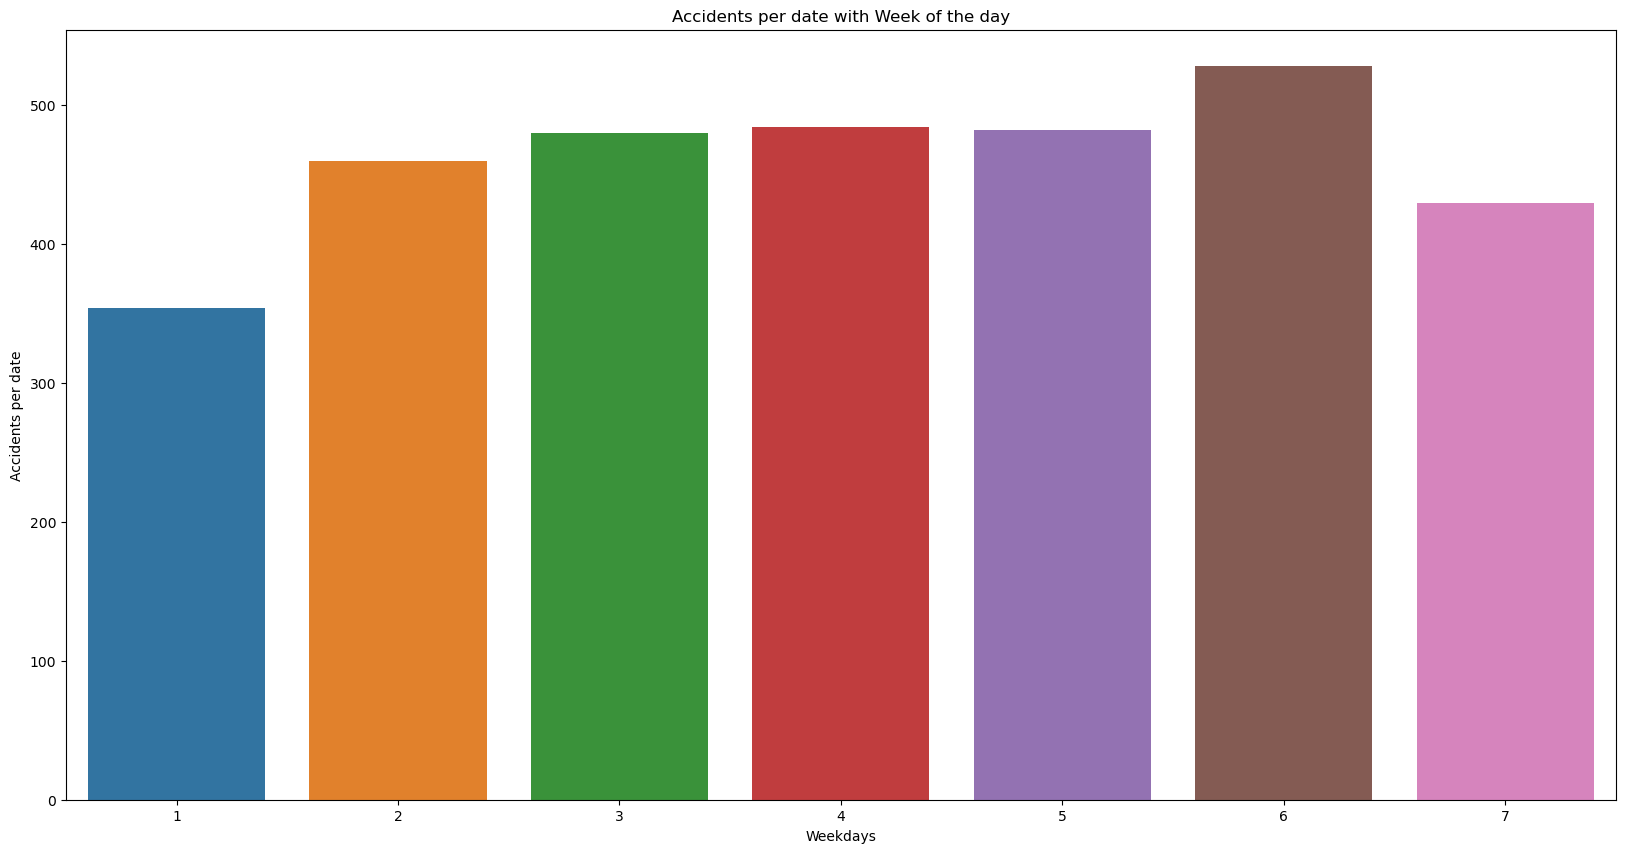

In [24]:
# Make bar plot of Accidents per date with Week of the day. Also add sum number of each bar on top of it 
#lets plot the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x = df1["Day_of_Week"], y = df1["Accidents_per_date"], ci = None)
plt.title("Accidents per date with Week of the day")
plt.xlabel("Weekdays")
plt.ylabel("Accidents per date")
plt.show()


c:\Users\s\miniconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s\miniconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


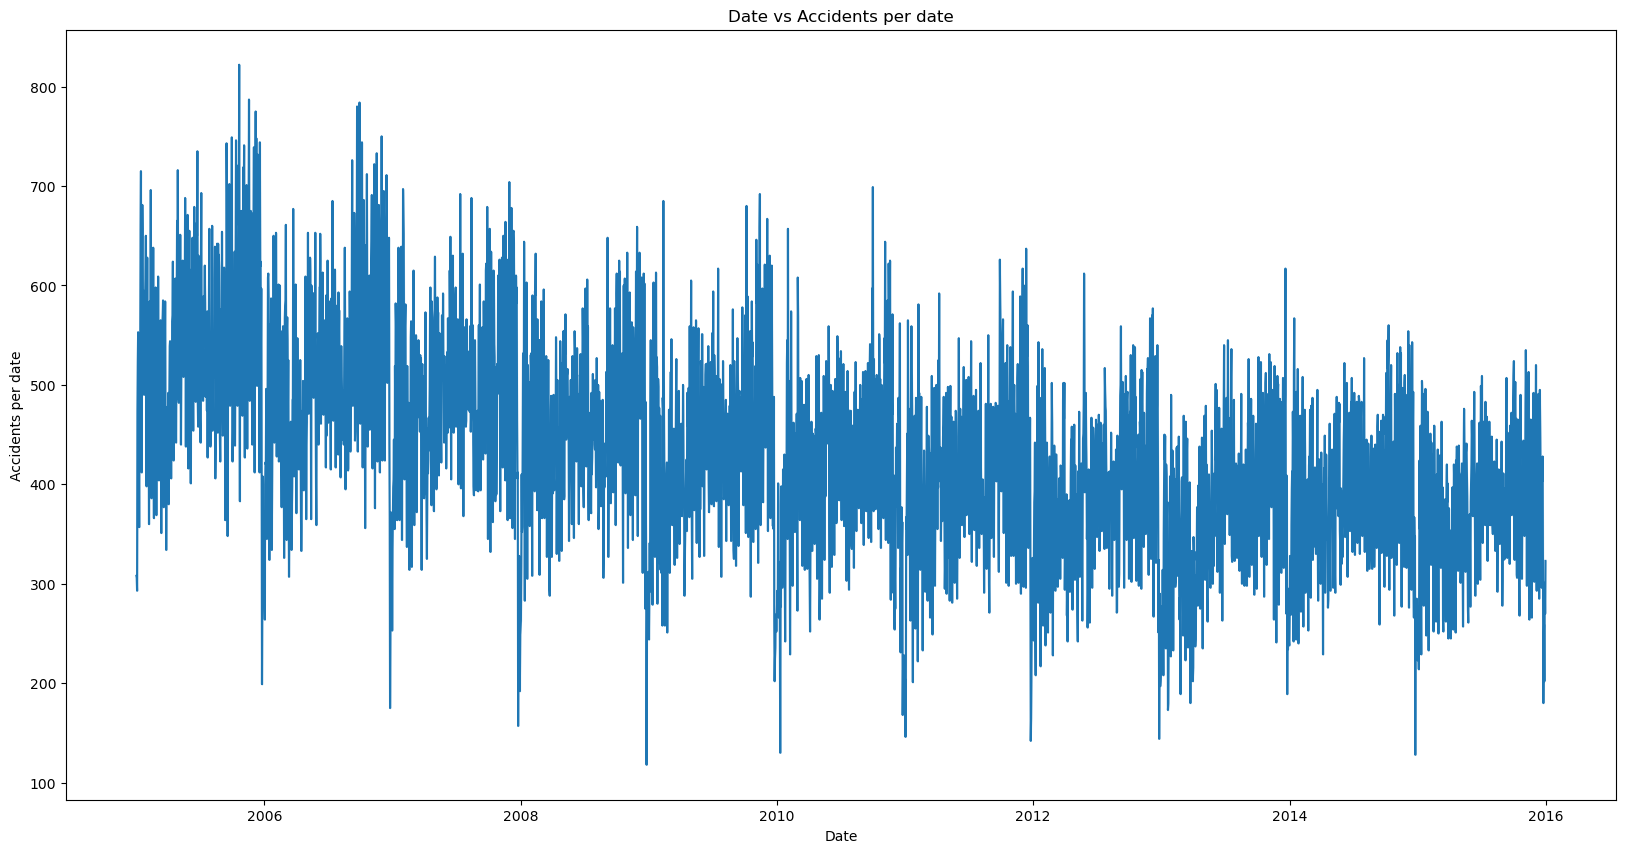

In [25]:
#Lets line plot of Date vs Accidents per date
plt.figure(figsize=(20, 10))
sns.lineplot(x = df1["Date"], y = df1["Accidents_per_date"])
plt.title("Date vs Accidents per date")
plt.xlabel("Date")
plt.ylabel("Accidents per date")
plt.show()

In [26]:
#lets check what is the start date and end date of the dataset 
print("Start Date of the Dataset: ", df1["Date"].min())
print("End Date of the Dataset: ", df1["Date"].max())

Start Date of the Dataset:  2005-01-01 00:00:00
End Date of the Dataset:  2015-12-31 00:00:00


In [27]:
#As we can see that the dataset is from 2005 to 2015 so we can take the data of last 3 years i.e. 2013, 2014 and 2015
df2 = df1[df1["Date"] >= "2013-01-01"]
df2.head().T

Ser,1355616,1355617,1355618,1355619,1355620
Longitude,-1.194859,-1.180279,-1.21601,-1.169397,-1.155147
Latitude,52.96643,52.948486,52.938829,52.978157,52.948202
Police_Force,31,31,31,31,31
Accident_Severity,3,3,3,3,3
Number_of_Vehicles,2,2,1,2,2
Number_of_Casualties,1,3,1,1,1
Date,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
Day_of_Week,3,3,3,3,3
Time,14,16,18,11,14
Local_Authority_(District),346,346,346,346,346


In [28]:
df2.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Accidents_per_date
Ser,,,,,,,,,,,,,,,,,,,,,
1355616,-1.194859,52.966430,31,3,2,1,2013-01-01,3,14,346,...,0,0,1,1,1,0,0,1,1,262
1355617,-1.180279,52.948486,31,3,2,3,2013-01-01,3,16,346,...,0,5,1,1,1,0,0,1,1,262
1355618,-1.216010,52.938829,31,3,1,1,2013-01-01,3,18,346,...,0,4,7,9,-1,0,0,1,2,262
1355619,-1.169397,52.978157,31,3,2,1,2013-01-01,3,11,346,...,0,0,1,1,1,0,0,1,1,262
1355620,-1.155147,52.948202,31,3,2,1,2013-01-01,3,14,346,...,0,0,1,1,1,0,0,1,1,262


In [29]:
#Lets check the start and end date of df2
print("Start Date of the Dataset: ", df2["Date"].min())
print("End Date of the Dataset: ", df2["Date"].max())


Start Date of the Dataset:  2013-01-01 00:00:00
End Date of the Dataset:  2015-12-31 00:00:00


In [30]:
#Lets See the description of the dataset
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Longitude,425038.0,-1.340928,-7.48941,-2.239095,-1.253786,-0.175339,1.758797,1.398725
Latitude,425038.0,52.50953,49.912941,51.475103,52.066331,53.420521,60.661117,1.430325
Police_Force,425038.0,30.124746,1.0,6.0,30.0,45.0,98.0,25.287627
Accident_Severity,425038.0,2.835069,1.0,3.0,3.0,3.0,3.0,0.400876
Number_of_Vehicles,425038.0,1.833448,1.0,1.0,2.0,2.0,67.0,0.712014
Number_of_Casualties,425038.0,1.327731,1.0,1.0,1.0,1.0,93.0,0.819154
Date,425038,2014-07-07 20:14:15.723958784,2013-01-01 00:00:00,2013-10-14 00:00:00,2014-07-08 00:00:00,2015-04-03 00:00:00,2015-12-31 00:00:00,NaN
Day_of_Week,425038.0,4.10261,1.0,2.0,4.0,6.0,7.0,1.914098
Time,425038.0,13.536286,0.0,10.0,14.0,17.0,23.0,5.066516
Local_Authority_(District),425038.0,345.944026,1.0,107.0,324.0,518.0,941.0,258.899932


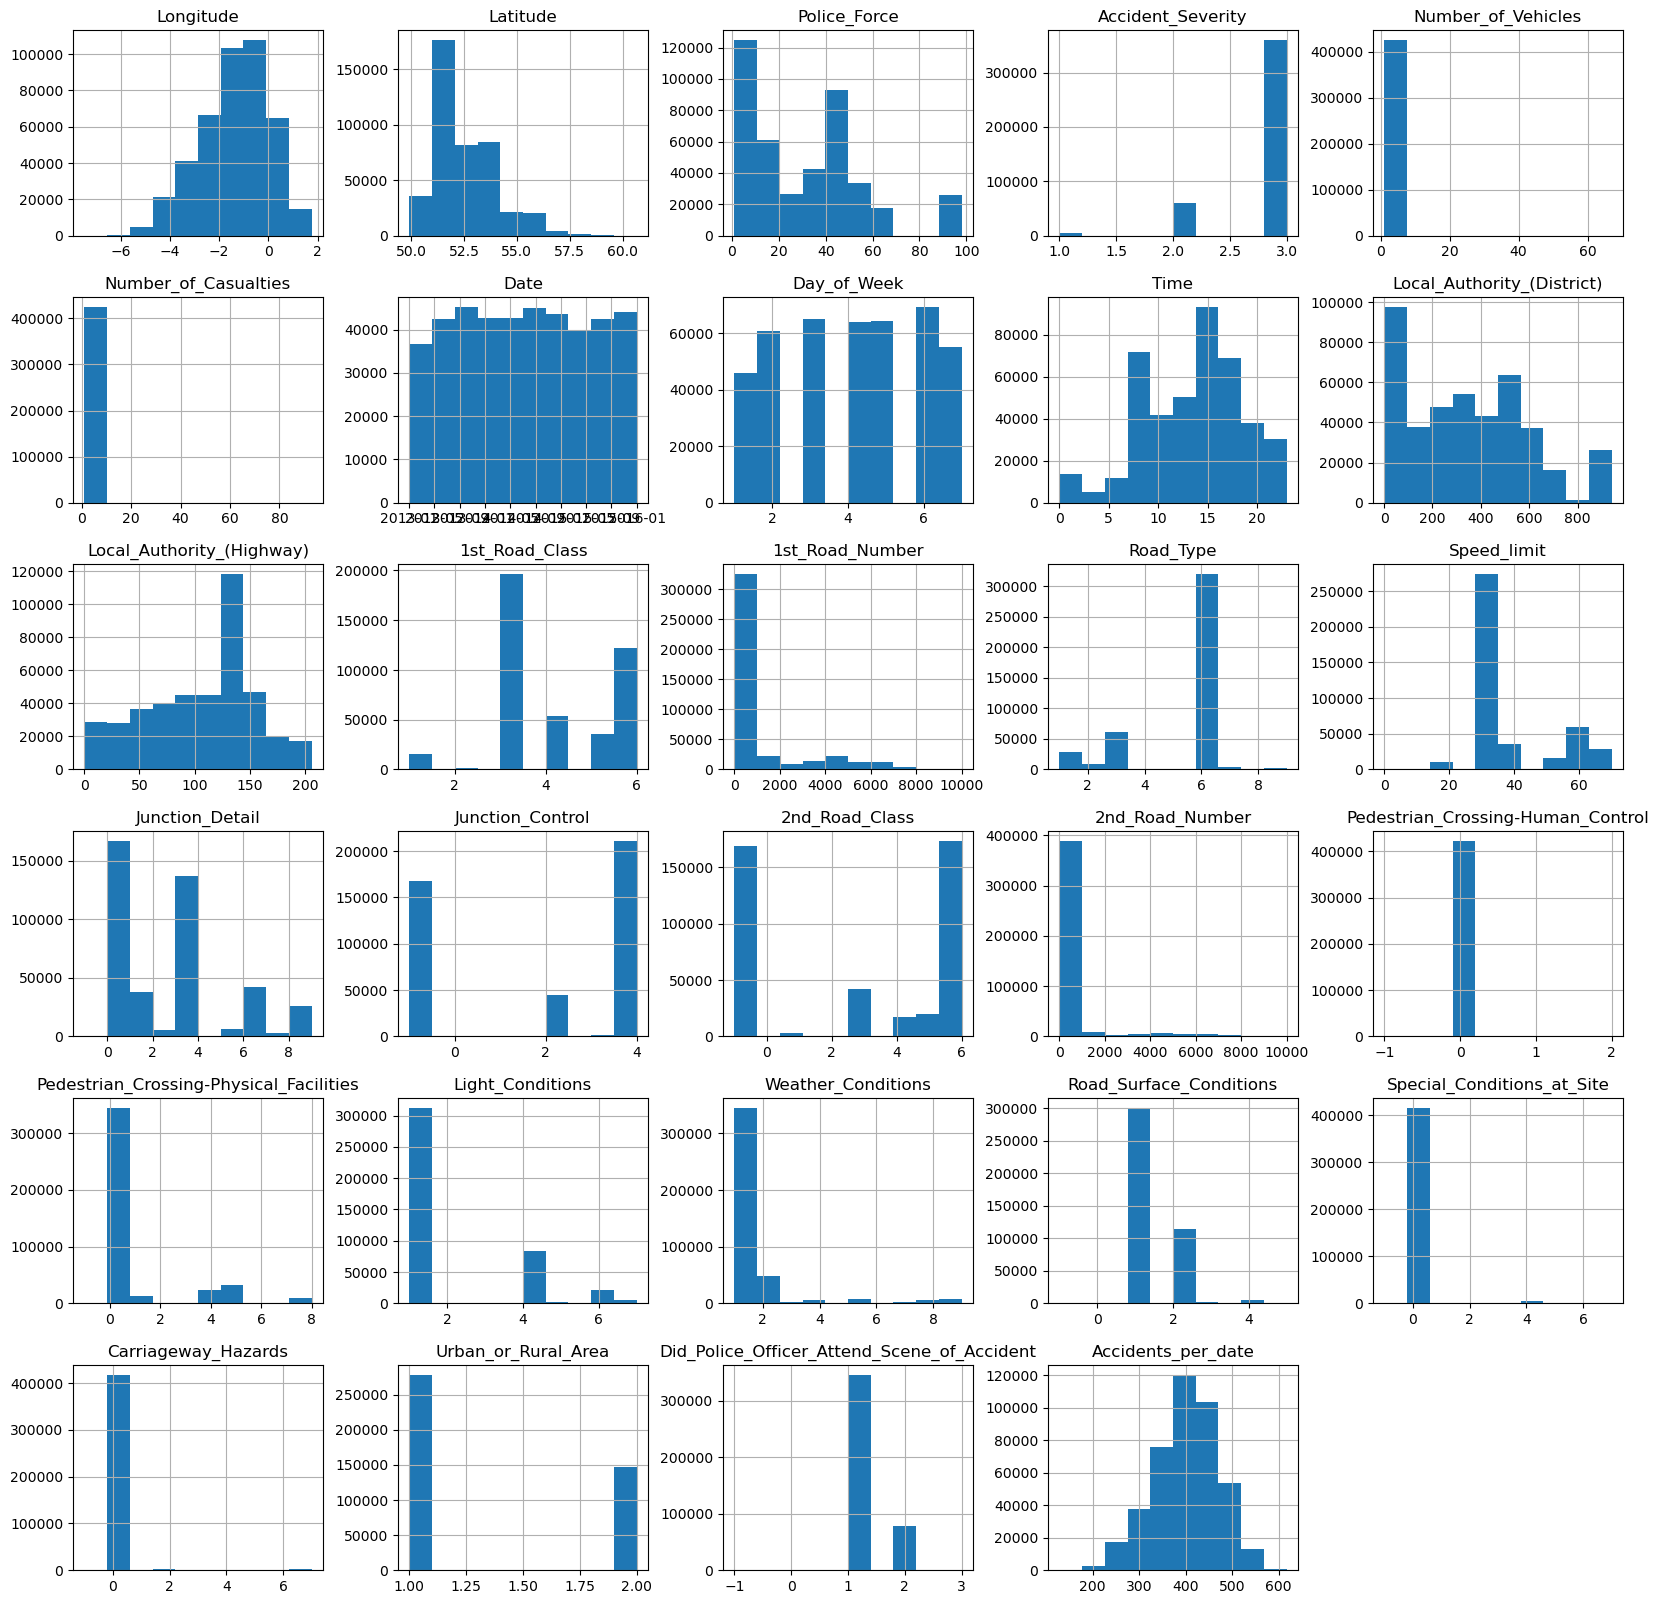

In [31]:
#Lets make histogram plot of the df2 except the date column
df2.hist(figsize=(20, 20))
plt.show()


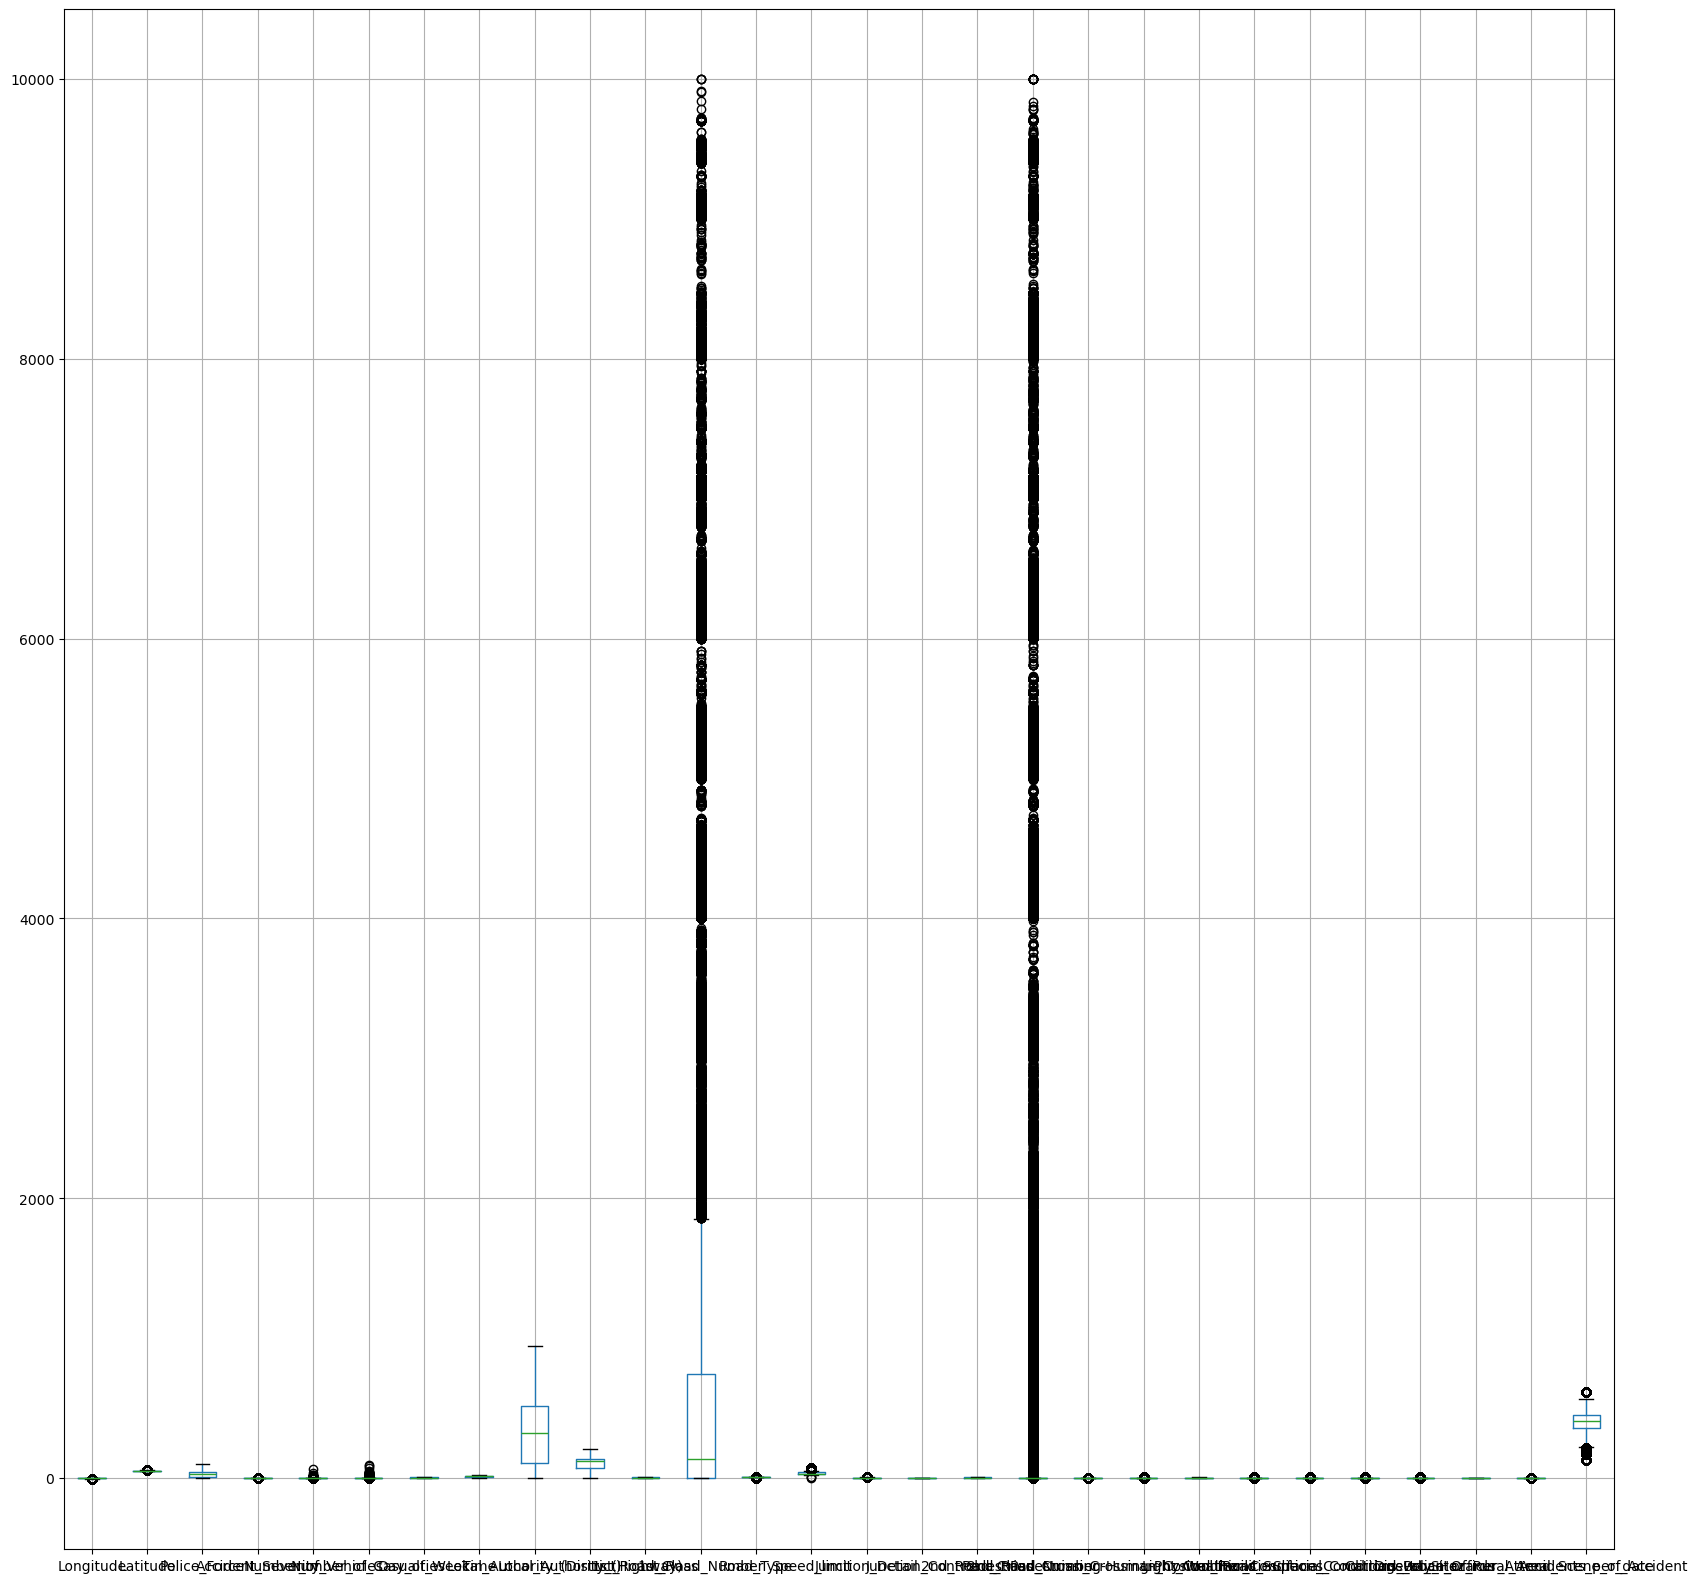

In [32]:
#lets make horizental box plot of each column 
plt.figure(figsize=(20, 20))
df2.boxplot()
plt.show()

In [33]:
df2.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Accidents_per_date'],
      dtype='object')

In [34]:
df2.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Accidents_per_date
Ser,,,,,,,,,,,,,,,,,,,,,
1355616,-1.194859,52.966430,31,3,2,1,2013-01-01,3,14,346,...,0,0,1,1,1,0,0,1,1,262
1355617,-1.180279,52.948486,31,3,2,3,2013-01-01,3,16,346,...,0,5,1,1,1,0,0,1,1,262
1355618,-1.216010,52.938829,31,3,1,1,2013-01-01,3,18,346,...,0,4,7,9,-1,0,0,1,2,262
1355619,-1.169397,52.978157,31,3,2,1,2013-01-01,3,11,346,...,0,0,1,1,1,0,0,1,1,262
1355620,-1.155147,52.948202,31,3,2,1,2013-01-01,3,14,346,...,0,0,1,1,1,0,0,1,1,262


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425038 entries, 1355616 to 1780653
Data columns (total 29 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Longitude                                    425038 non-null  float64       
 1   Latitude                                     425038 non-null  float64       
 2   Police_Force                                 425038 non-null  int64         
 3   Accident_Severity                            425038 non-null  int64         
 4   Number_of_Vehicles                           425038 non-null  int64         
 5   Number_of_Casualties                         425038 non-null  int64         
 6   Date                                         425038 non-null  datetime64[ns]
 7   Day_of_Week                                  425038 non-null  int64         
 8   Time                                         425038 non-null  

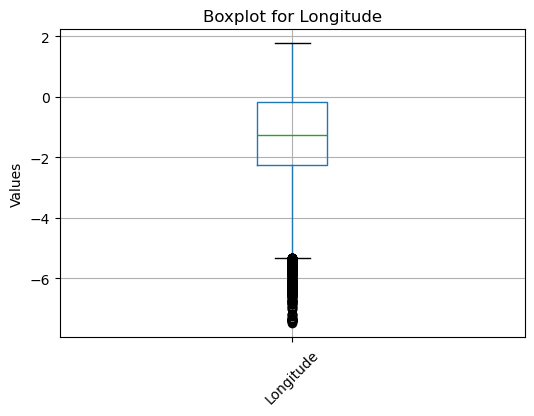

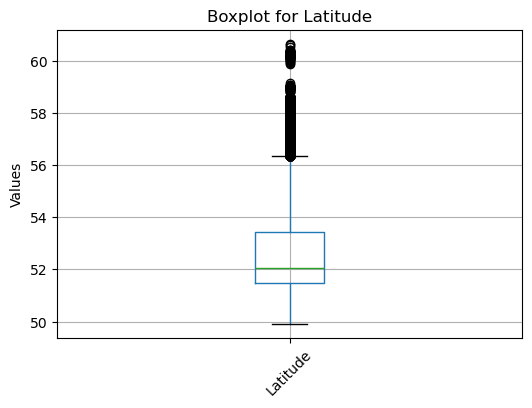

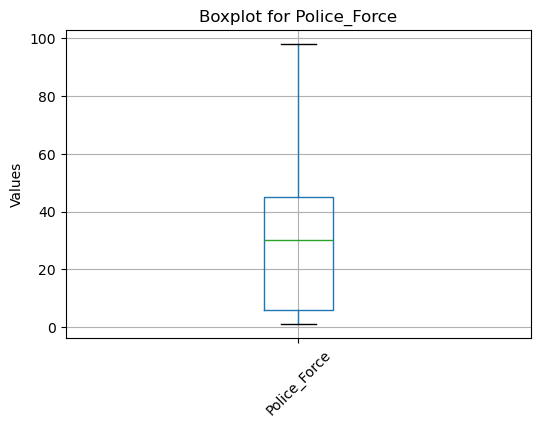

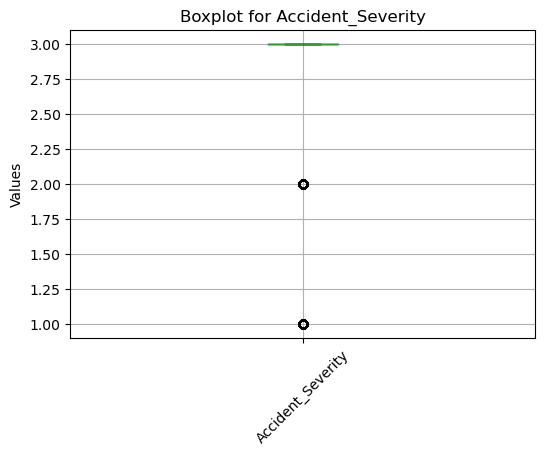

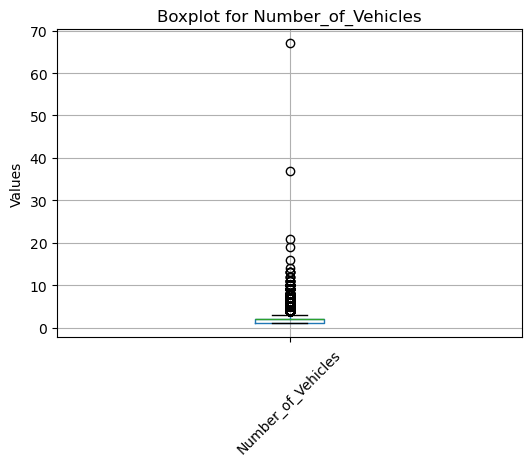

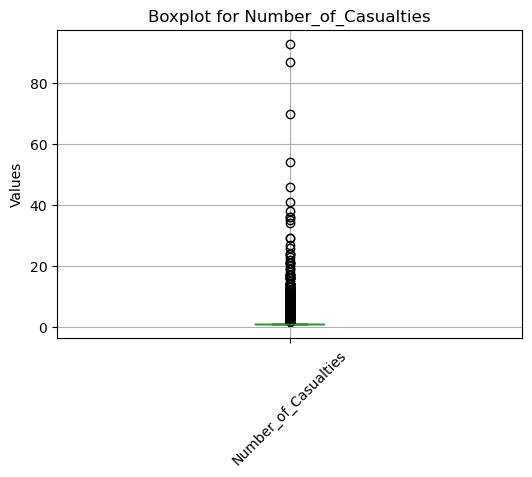

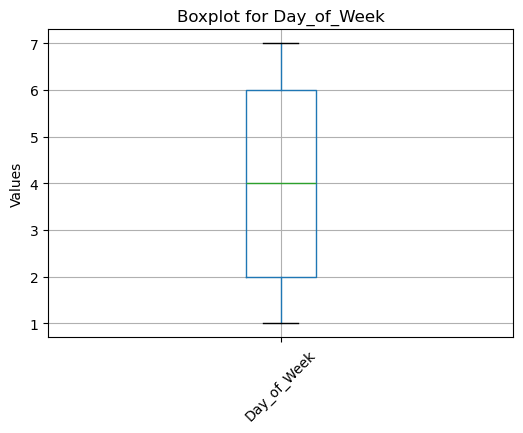

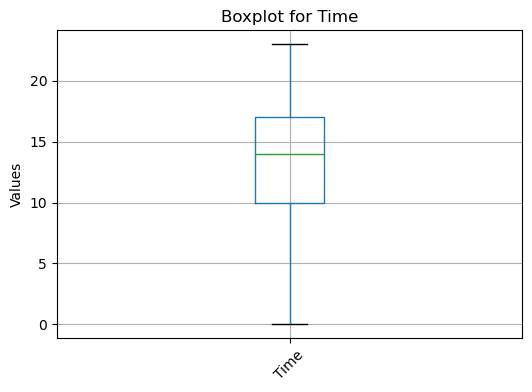

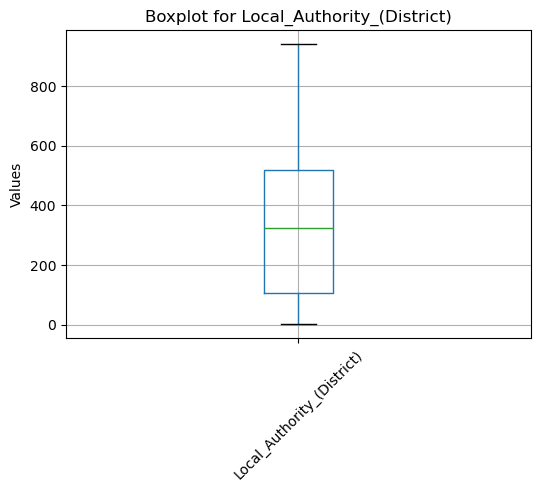

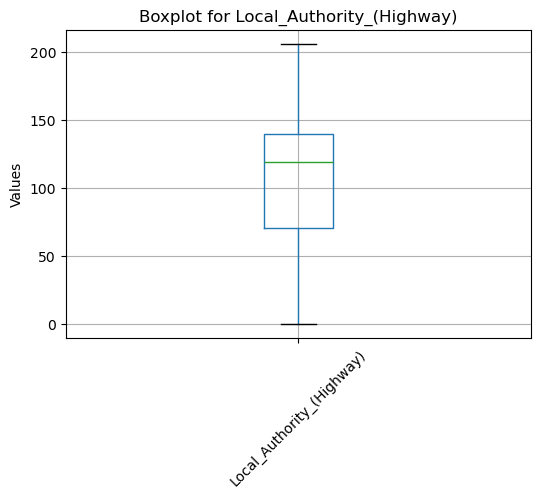

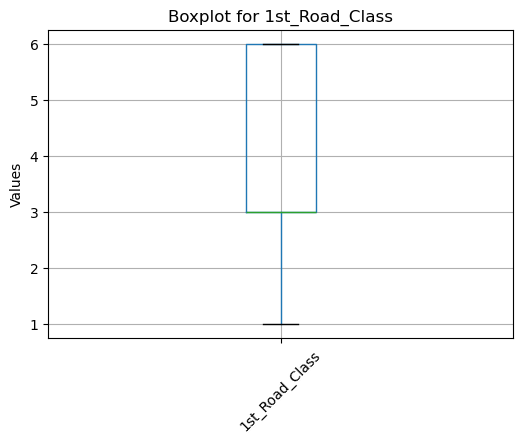

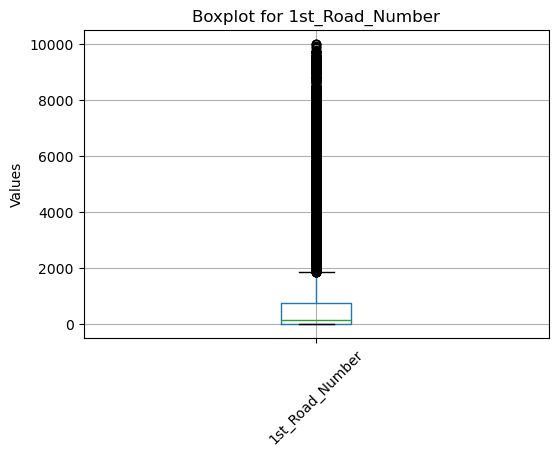

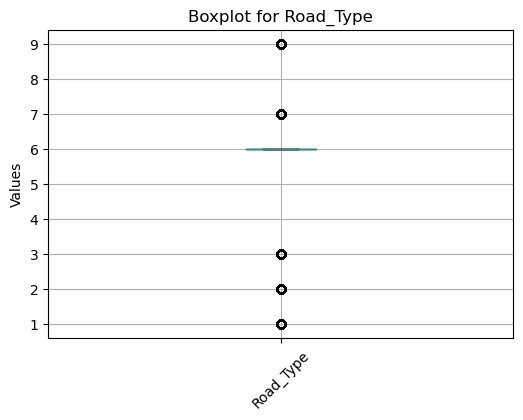

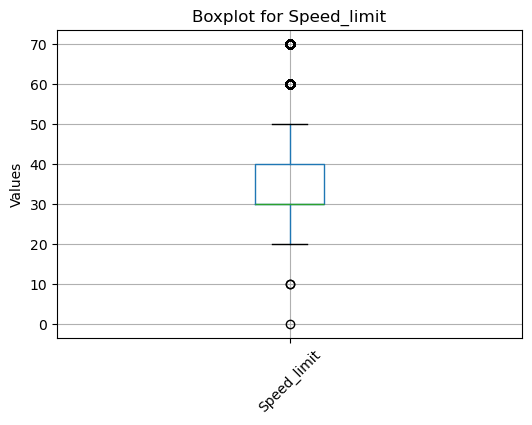

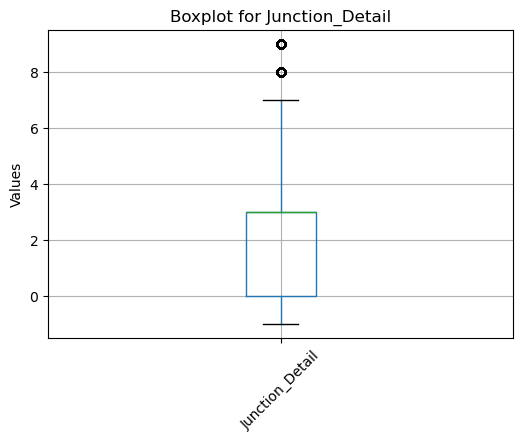

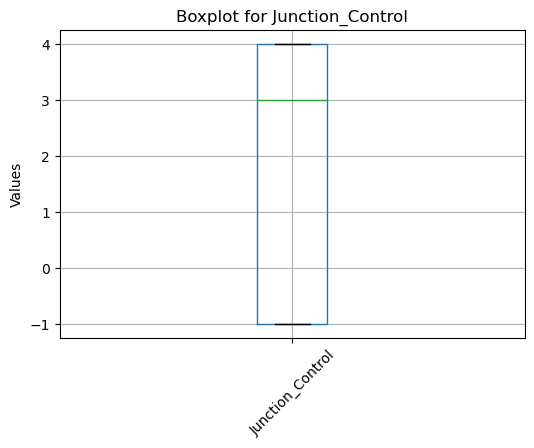

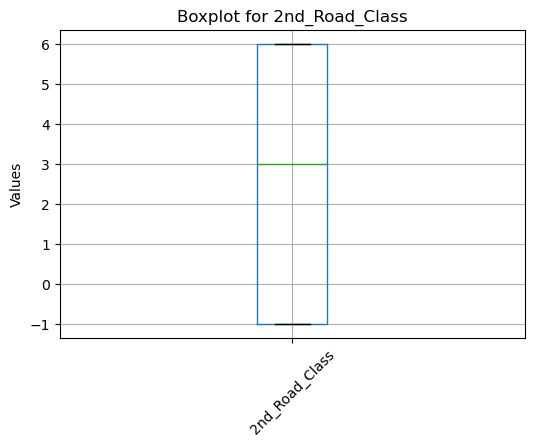

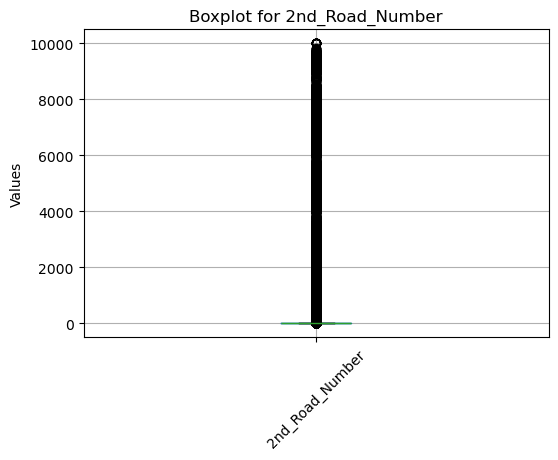

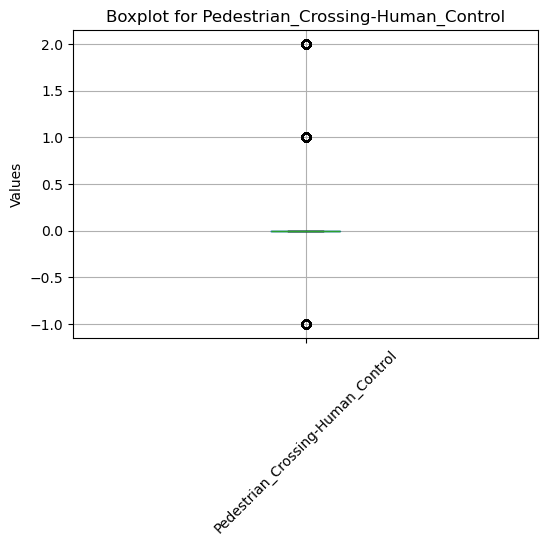

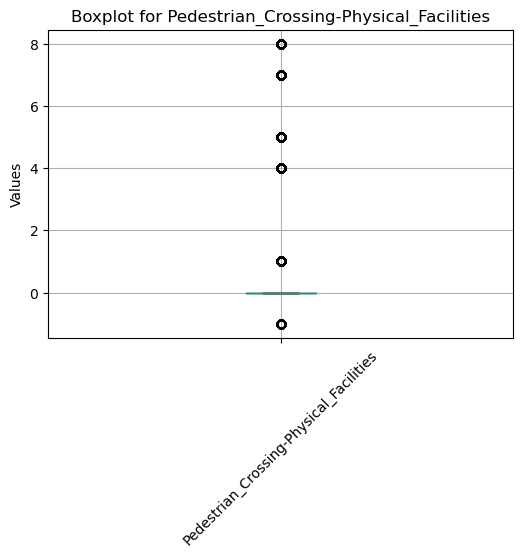

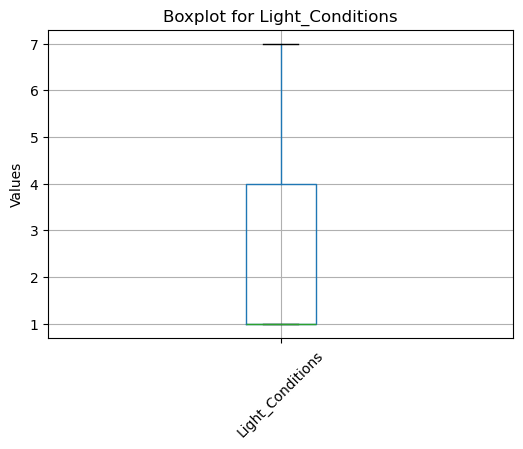

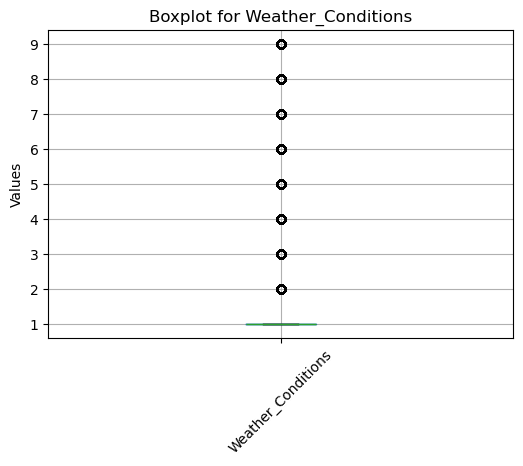

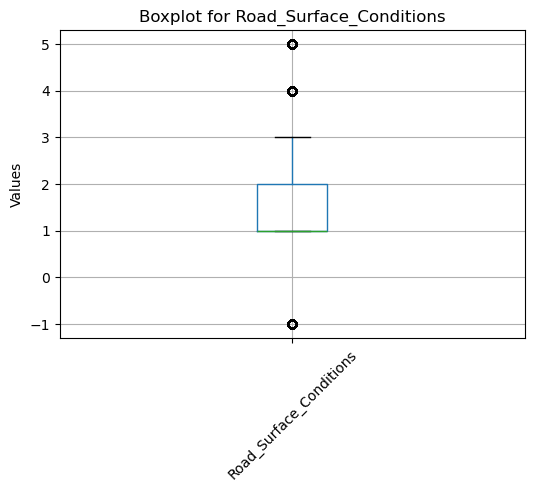

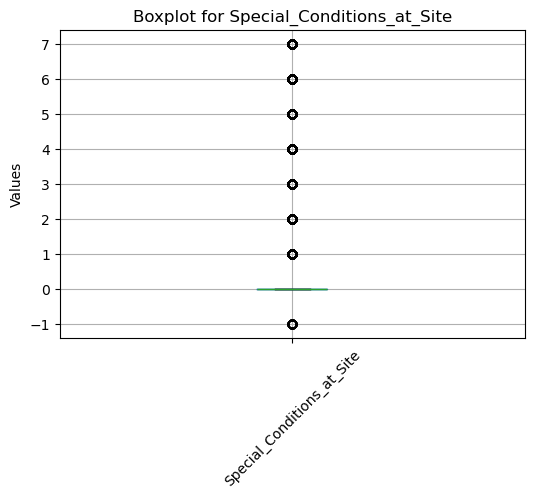

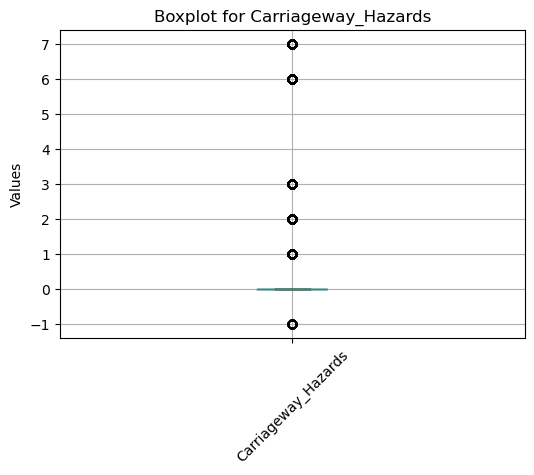

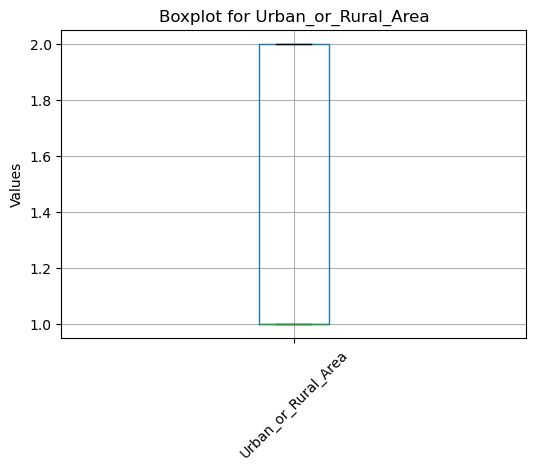

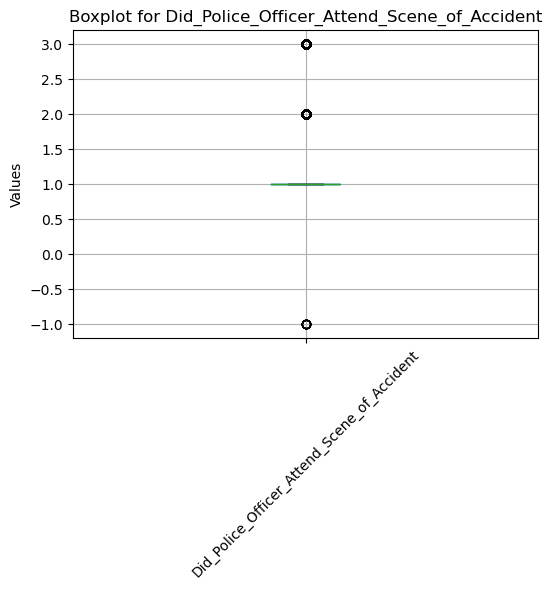

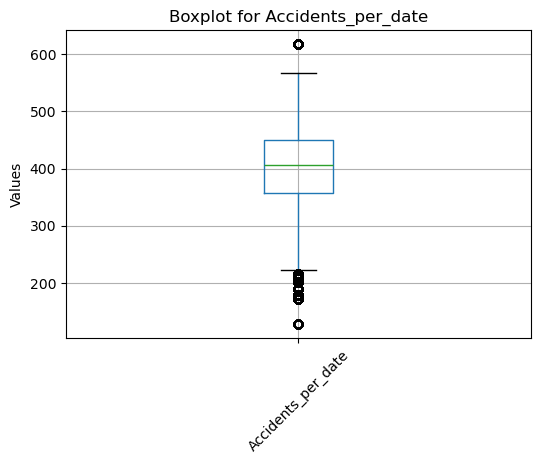

In [36]:
# Drop non-numeric columns if any
df_numeric = df2.drop(["Date"], axis=1, errors="ignore")

# Plot boxplot for each column separately
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    df_numeric[[column]].boxplot()
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.show()

In [37]:
#Lets check the start and end date of df2
print("Start Date of the Dataset: ", df2["Date"].min())
print("End Date of the Dataset: ", df2["Date"].max())


Start Date of the Dataset:  2013-01-01 00:00:00
End Date of the Dataset:  2015-12-31 00:00:00


In [38]:
#Set the Date as index column
df2 = df2.set_index("Date")
df2.head().T

Date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01
Longitude,-1.194859,-1.180279,-1.216010,-1.169397,-1.155147
Latitude,52.966430,52.948486,52.938829,52.978157,52.948202
Police_Force,31.000000,31.000000,31.000000,31.000000,31.000000
Accident_Severity,3.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,2.000000,2.000000,1.000000,2.000000,2.000000
Number_of_Casualties,1.000000,3.000000,1.000000,1.000000,1.000000
Day_of_Week,3.000000,3.000000,3.000000,3.000000,3.000000
Time,14.000000,16.000000,18.000000,11.000000,14.000000
Local_Authority_(District),346.000000,346.000000,346.000000,346.000000,346.000000
Local_Authority_(Highway),17.000000,17.000000,17.000000,17.000000,17.000000


In [39]:
#Lets Add ser column to the dataset as its first column 
df2.insert(0, "Ser", range(1, 1+len(df2)))
df2.head().T

Date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01
Ser,1.000000,2.000000,3.000000,4.000000,5.000000
Longitude,-1.194859,-1.180279,-1.216010,-1.169397,-1.155147
Latitude,52.966430,52.948486,52.938829,52.978157,52.948202
Police_Force,31.000000,31.000000,31.000000,31.000000,31.000000
Accident_Severity,3.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,2.000000,2.000000,1.000000,2.000000,2.000000
Number_of_Casualties,1.000000,3.000000,1.000000,1.000000,1.000000
Day_of_Week,3.000000,3.000000,3.000000,3.000000,3.000000
Time,14.000000,16.000000,18.000000,11.000000,14.000000
Local_Authority_(District),346.000000,346.000000,346.000000,346.000000,346.000000


In [40]:
#Lets Apply Min Max Scaler to all the column except first two and last column 
scaler = MinMaxScaler()
df2.iloc[:, 2:-1] = scaler.fit_transform(df2.iloc[:, 2:-1])
df2.head().T
import warnings
warnings.filterwarnings("ignore")


C:\Users\s\AppData\Local\Temp\ipykernel_13136\3453592837.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.30927835 0.30927835 0.30927835 ... 0.5257732  0.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.iloc[:, 2:-1] = scaler.fit_transform(df2.iloc[:, 2:-1])
C:\Users\s\AppData\Local\Temp\ipykernel_13136\3453592837.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 1. ... 1. 1. 1.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.iloc[:, 2:-1] = scaler.fit_transform(df2.iloc[:, 2:-1])
C:\Users\s\AppData\Local\Temp\ipykernel_13136\3453592837.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01515152 0.01515152 0.         ... 0.         0.01515152 0

In [41]:
df2.head()

,Ser,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Accidents_per_date
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,-1.194859,0.284094,0.309278,1.0,0.015152,0.000000,0.333333,0.608696,0.367021,...,0.333333,0.111111,0.0,0.0,0.333333,0.125,0.125,0,0.50,262
2013-01-01,2,-1.180279,0.282424,0.309278,1.0,0.015152,0.021739,0.333333,0.695652,0.367021,...,0.333333,0.666667,0.0,0.0,0.333333,0.125,0.125,0,0.50,262
2013-01-01,3,-1.216010,0.281526,0.309278,1.0,0.000000,0.000000,0.333333,0.782609,0.367021,...,0.333333,0.555556,1.0,1.0,0.000000,0.125,0.125,0,0.75,262
2013-01-01,4,-1.169397,0.285185,0.309278,1.0,0.015152,0.000000,0.333333,0.478261,0.367021,...,0.333333,0.111111,0.0,0.0,0.333333,0.125,0.125,0,0.50,262
2013-01-01,5,-1.155147,0.282398,0.309278,1.0,0.015152,0.000000,0.333333,0.608696,0.367021,...,0.333333,0.111111,0.0,0.0,0.333333,0.125,0.125,0,0.50,262


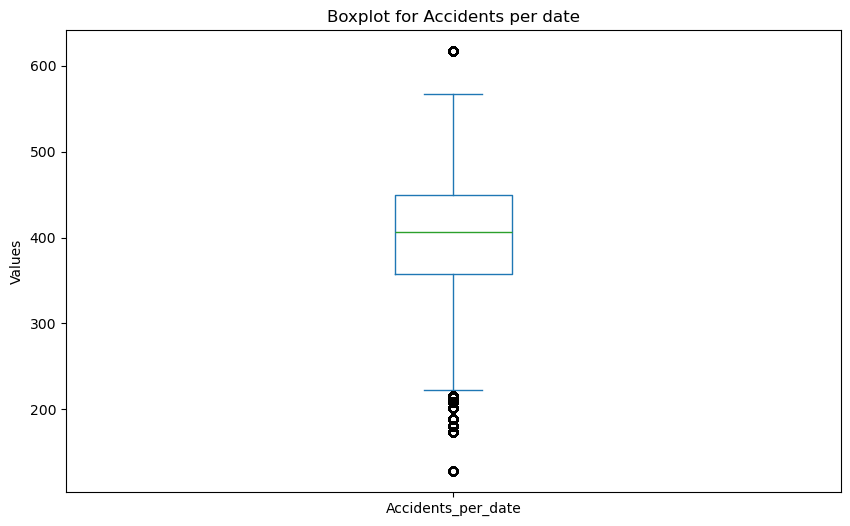

In [42]:
#lets see the boxplot for the Accident per date column 
plt.figure(figsize=(10, 6))
df2["Accidents_per_date"].plot(kind = "box")
plt.title("Boxplot for Accidents per date")
plt.ylabel("Values")
plt.show()


In [43]:
#Lets takae the last 3 months data from df2
df3 = df2[df2.index >= "2015-10-01"]

#Now check start and end date of df3
print("Start Date of the Dataset: ", df3.index.min())

print("End Date of the Dataset: ", df3.index.max())



Start Date of the Dataset:  2015-10-01 00:00:00
End Date of the Dataset:  2015-12-31 00:00:00


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36417 entries, 2015-10-01 to 2015-12-31
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Ser                                          36417 non-null  int64  
 1   Longitude                                    36417 non-null  float64
 2   Latitude                                     36417 non-null  float64
 3   Police_Force                                 36417 non-null  float64
 4   Accident_Severity                            36417 non-null  float64
 5   Number_of_Vehicles                           36417 non-null  float64
 6   Number_of_Casualties                         36417 non-null  float64
 7   Day_of_Week                                  36417 non-null  float64
 8   Time                                         36417 non-null  float64
 9   Local_Authority_(District)                   36417 non-

In [45]:
#Lets apply the different ML model to predict the number of accidents per day and its accuracy usring the accuracy and rmse
#Split the dataset into training and testing dataset
X = df3.iloc[:, 1:-1]
y = df3["Accidents_per_date"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [46]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression Accuracy: ", lr.score(X_test, y_test))
print("Linear Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression Accuracy:  0.0755580323855457
Linear Regression RMSE:  69.79794604239605


In [47]:
# #Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("Support Vector Regression Accuracy: ", svr.score(X_test, y_test))
print("Support Vector Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Support Vector Regression Accuracy:  0.07965485400850358
Support Vector Regression RMSE:  69.64311358277939


In [48]:
#Save the dataset as last_3_months_accidents.csv
df3.to_csv("last_3_months_accidents.csv")

In [50]:
#Random Forest Regression
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print("Random Forest Regression Accuracy: ", rfr.score(X_test, y_test))
print("Random Forest Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
#Decision Tree Regression
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("Decision Tree Regression Accuracy: ", dtr.score(X_test, y_test))
print("Decision Tree Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
#Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("Gradient Boosting Regression Accuracy: ", gbr.score(X_test, y_test))
print("Gradient Boosting Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))



In [ ]:
#Ada Boost Regression
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred = abr.predict(X_test)
print("Ada Boost Regression Accuracy: ", abr.score(X_test, y_test))
print("Ada Boost Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
#Bagging Regression
bar = BaggingRegressor()
bar.fit(X_train, y_train)
y_pred = bar.predict(X_test)
print("Bagging Regression Accuracy: ", bar.score(X_test, y_test))
print("Bagging Regression RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
#LSTM   
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print("LSTM Train RMSE: ", np.sqrt(mean_squared_error(y_train, train_predict)))




In [ ]:
#GRU
from keras.layers import GRU

model = Sequential()
model.add(GRU(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(GRU(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print("GRU Train RMSE: ", np.sqrt(mean_squared_error(y_train, train_predict)))


In [ ]:
#predicut using prophet model 
from fbprophet import Prophet

# df3 = df2.reset_index()
# df3 = df3[["Date", "Accidents_per_date"]]
df3.columns = ["ds", "y"]

train = df3[df3["ds"] < "2015-01-01"]
test = df3[df3["ds"] >= "2015-01-01"]

model = Prophet()


model.fit(train)

future = model.make_future_dataframe(periods = len(test))
forecast = model.predict(future)

y_pred = forecast["yhat"].values[-len(test):]
y_true = test["y"].values

print("Prophet RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))


In [ ]:
#Apply SARIMA Model as we can see some type of seasonality in the dataset
from statsmodels.tsa.statespace.sarimax import SARIMAX

train = df2[df2.index < "2015-01-01"]

model = SARIMAX(train["Accidents_per_date"], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()
y_pred = model_fit.forecast(steps = len(test))

print("SARIMA RMSE: ", np.sqrt(mean_squared_error(test["Accidents_per_date"], y_pred)))

#Lets plot the actual vs predicted values of the test dataset
plt.figure(figsize=(20, 10))
plt.plot(test.index, y_pred, label = "Predicted Values")

plt.plot(test.index, test["Accidents_per_date"], label = "Actual Values")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")

plt.ylabel("Accidents per date")

plt.legend()

plt.show()



In [ ]:
#lets check the Neural Network Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(X_train, y_train, epochs = 1, batch_size = 1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print("Neural Network Train RMSE: ", np.sqrt(mean_squared_error(y_train, train_predict)))

#Lets plot the actual vs predicted values of the test dataset

plt.figure(figsize=(20, 10))
plt.plot(test.index, test_predict, label = "Predicted Values")

plt.plot(test.index, test["Accidents_per_date"], label = "Actual Values")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")

plt.ylabel("Accidents per date")

plt.legend()
